**Objective:** To train the cnn model and test its performance

**importing the necessary modules**

In [1]:
import numpy as np
import cv2
import os
from os import listdir
import time 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle


import tensorflow as tf

from tensorflow.keras.models import Model, load_model

**Creating a function to load all the images and put it into arrays**

In [2]:
def load_data(dir_list, image_size):
    X = []
    y = []
    image_width, image_height = image_size

    for directory in dir_list:
        if directory.endswith('yes'):
            label = 1
        else:
            label=0

        for filename in os.listdir(directory):
            image_path = os.path.join(directory, filename)
            image = cv2.imread(image_path)

            if image is None:
                print(f"[WARN] Skipping unreadable image: {image_path}")
                continue

            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, (image_width, image_height))
            image = image.reshape((image_width, image_height, 1))
            image = image / 255.0

            X.append(image)
            y.append([label])

    X = np.array(X)
    y = np.array(y)

    X, y = shuffle(X, y)

    print(f'✅ Number of examples: {len(X)}')
    print(f'✅ X shape: {X.shape}')
    print(f'✅ y shape: {y.shape}')

    return X, y

**Processing the loaded images and appending them into arrays**

In [3]:
augmented_path = r'C:\Users\Devab\OneDrive\Desktop\Coding\Projects\Tumor Classification\Augmented Data/'

# augmented data (yes and no) contains both the original and the new generated examples
yes_path = r"C:\Users\Devab\OneDrive\Desktop\Coding\Projects\Tumor Classification\Augmented Data\yes"
no_path =r"C:\Users\Devab\OneDrive\Desktop\Coding\Projects\Tumor Classification\Augmented Data\no"

IMG_WIDTH, IMG_HEIGHT = (240, 240)

X, y = load_data([yes_path, no_path], (IMG_WIDTH, IMG_HEIGHT))

✅ Number of examples: 10117
✅ X shape: (10117, 240, 240, 1)
✅ y shape: (10117, 1)


**Splitting the data into test and train**

In [4]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5)

**Loading the model**

In [5]:
model1=load_model("detection_model.keras")
model2=load_model("custom_detection_model.keras")

c:\Users\Devab\OneDrive\Desktop\Coding\Projects\Tumor Classification\venv\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
c:\Users\Devab\OneDrive\Desktop\Coding\Projects\Tumor Classification\venv\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [6]:
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{round(s,1)}"

**Defining checkpoints and early stopping of training to reduce overfitting and reduce training time**

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(
    "best_model.keras",                # Use `.keras` format (recommended)
    monitor="val_accuracy",           # or "val_loss" if you prefer
    save_best_only=True,
    verbose=1,
    mode="max"                         # "min" for loss
)

early_stop = EarlyStopping(
    monitor="val_accuracy",
    patience=5,
    restore_best_weights=True
)

***Model-1***

**Training**

In [8]:
start_time = time.time()


model1.fit(x=X_train, y=y_train, batch_size=64, epochs=10,validation_data=(X_val, y_val),
    callbacks=[checkpoint, early_stop])


end_time = time.time()
execution_time = (end_time - start_time)
print(f"Elapsed time: {hms_string(execution_time)}")


Epoch 1/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.6363 - loss: 0.7668
Epoch 1: val_accuracy improved from -inf to 0.69664, saving model to best_model.keras
127/127 ━━━━━━━━━━━━━━━━━━━━ 58s 447ms/step - accuracy: 0.6366 - loss: 0.7657 - val_accuracy: 0.6966 - val_loss: 0.6415
Epoch 2/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.7732 - loss: 0.4826
Epoch 2: val_accuracy improved from 0.69664 to 0.74308, saving model to best_model.keras
127/127 ━━━━━━━━━━━━━━━━━━━━ 58s 460ms/step - accuracy: 0.7731 - loss: 0.4827 - val_accuracy: 0.7431 - val_loss: 0.5907
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - accuracy: 0.7724 - loss: 0.4675
Epoch 3: val_accuracy improved from 0.74308 to 0.75593, saving model to best_model.keras
127/127 ━━━━━━━━━━━━━━━━━━━━ 65s 509ms/step - accuracy: 0.7725 - loss: 0.4675 - val_accuracy: 0.7559 - val_loss: 0.5233
Epoch 4/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 789ms/step - accuracy: 0.7930 - loss: 0.4404
Epoch 4: val_accuracy di

**Training for some more epochs**

In [9]:
start_time = time.time()

model1.fit(x=X_train, y=y_train, batch_size=64, epochs=5,validation_data=(X_val, y_val),
    callbacks=[checkpoint, early_stop])

end_time = time.time()
execution_time = (end_time - start_time)
print(f"Elapsed time: {hms_string(execution_time)}")


Epoch 1/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8651 - loss: 0.3033
Epoch 1: val_accuracy did not improve from 0.83794
127/127 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.8650 - loss: 0.3035 - val_accuracy: 0.8350 - val_loss: 0.3812
Epoch 2/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8706 - loss: 0.3020
Epoch 2: val_accuracy did not improve from 0.83794
127/127 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.8706 - loss: 0.3019 - val_accuracy: 0.8162 - val_loss: 0.4290
Epoch 3/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8767 - loss: 0.2891
Epoch 3: val_accuracy did not improve from 0.83794
127/127 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.8767 - loss: 0.2892 - val_accuracy: 0.6779 - val_loss: 0.7545
Epoch 4/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8882 - loss: 0.2706
Epoch 4: val_accuracy did not improve from 0.83794
127/127 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.8882 - loss: 0.2706 - val_accuracy: 0.8281 - val_l

**Getting the training history to plot  the graph of loss vs accuracy**

In [10]:
hist=model1.history.history

In [11]:
for key in hist.keys():
    print(key)

accuracy
loss
val_accuracy
val_loss


**Function to plot the graphs**

In [12]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

**Plotting the metrics of the training**

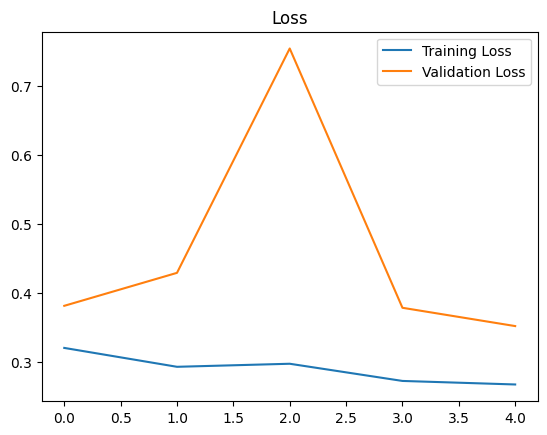

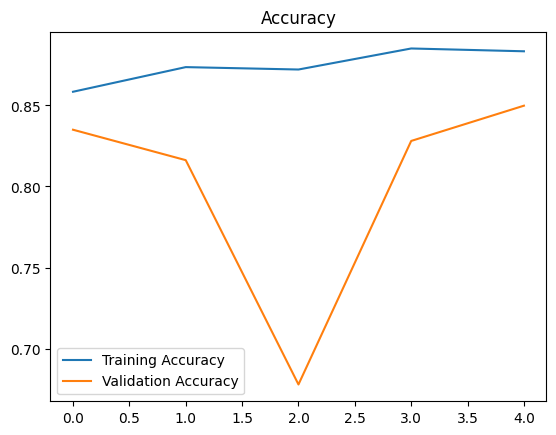

In [13]:
plot_metrics(hist) 


**Loading the best model and evaluating it**

In [14]:
best=load_model("best_model.keras")

In [15]:
best.metrics_names


['loss', 'compile_metrics']

In [16]:
loss, acc = best.evaluate(x=X_test, y=y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.8302 - loss: 0.3648


In [17]:
print (f"Test Loss = {loss}")
print (f"Test Accuracy = {acc}")

Test Loss = 0.33792436122894287
Test Accuracy = 0.8478260636329651


In [18]:
# Predict probabilities
y_pred_probs = best.predict(X_test)

# Convert to binary predictions
y_pred = (y_pred_probs > 0.5).astype(int).flatten()


y_true = y_test.flatten()

# Calculate F1
from sklearn.metrics import f1_score
f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step
F1 Score: 0.8469


<hr>